In [1]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import copy, time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from scipy.special import boxcox1p
from scipy import stats
from sklearn.preprocessing import PowerTransformer

data_path = '../input/enron_midterm/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

train_Y = df_train['poi']
names = df_test['name']

df_train = df_train.drop(['name', 'poi'], axis=1)
df_train

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,500000.0,NaN,NaN,NaN,frank.stabler@enron.com,NaN,16514.0,NaN,NaN,NaN,NaN,NaN,356071.0,511734.0,NaN,239502.0,NaN,NaN,1112087.0,511734.0
109,NaN,NaN,NaN,NaN,michael.brown@enron.com,NaN,49288.0,41.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,761.0,1486.0,49288.0,NaN
110,300000.0,NaN,NaN,NaN,mark.pickering@enron.com,28798.0,31653.0,67.0,7.0,0.0,400000.0,NaN,NaN,NaN,NaN,655037.0,728.0,898.0,1386690.0,28798.0
111,NaN,NaN,NaN,NaN,david.haug@enron.com,NaN,475.0,19.0,4.0,7.0,NaN,NaN,NaN,2217299.0,NaN,NaN,471.0,573.0,475.0,2217299.0


In [2]:
df_test = df_test.drop('name', axis=1)
df_test

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,15.0,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,609.0,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,12.0,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0
5,1700000.0,NaN,NaN,NaN,gary.hickerson@enron.com,NaN,98849.0,27.0,40.0,1.0,NaN,69223.0,1936.0,441096.0,NaN,211788.0,900.0,1320.0,2081796.0,441096.0
6,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,6.0,2000000.0,1617011.0,7427621.0,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
7,NaN,NaN,-98784.0,98784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32460.0,-32460.0,NaN,NaN,NaN,NaN,NaN
8,800000.0,NaN,-300000.0,NaN,jeff.donahue@enron.com,765920.0,96268.0,22.0,188.0,11.0,NaN,NaN,891.0,315068.0,NaN,278601.0,772.0,865.0,875760.0,1080988.0
9,100000.0,51365.0,-200000.0,NaN,NaN,4160672.0,8409.0,NaN,NaN,NaN,NaN,156250.0,202052.0,201483.0,-140264.0,76399.0,NaN,NaN,394475.0,4221891.0


In [3]:
df = pd.concat([df_train, df_test])
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [4]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


In [5]:
# The email_address could be seen as representative like the name, so it can be dropped from the data set.
df = df.drop(['email_address'], axis=1)

In [6]:
# drop columns whose missing ratio greater than 80%
df = df.drop(['loan_advances', 'director_fees', 'restricted_stock_deferred'], axis=1)


In [7]:
df.isnull().sum()

bonus                       64
deferral_payments          107
deferred_income             97
exercised_stock_options     44
expenses                    51
from_messages               60
from_poi_to_this_person     60
from_this_person_to_poi     60
long_term_incentive         80
other                       53
restricted_stock            36
salary                      51
shared_receipt_with_poi     60
to_messages                 60
total_payments              21
total_stock_value           20
dtype: int64

In [8]:
num_features = []
obj_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
    else:
        obj_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')
print(f'{len(obj_features)} Numeric Features : {obj_features}\n')

16 Numeric Features : ['bonus', 'deferral_payments', 'deferred_income', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

0 Numeric Features : []



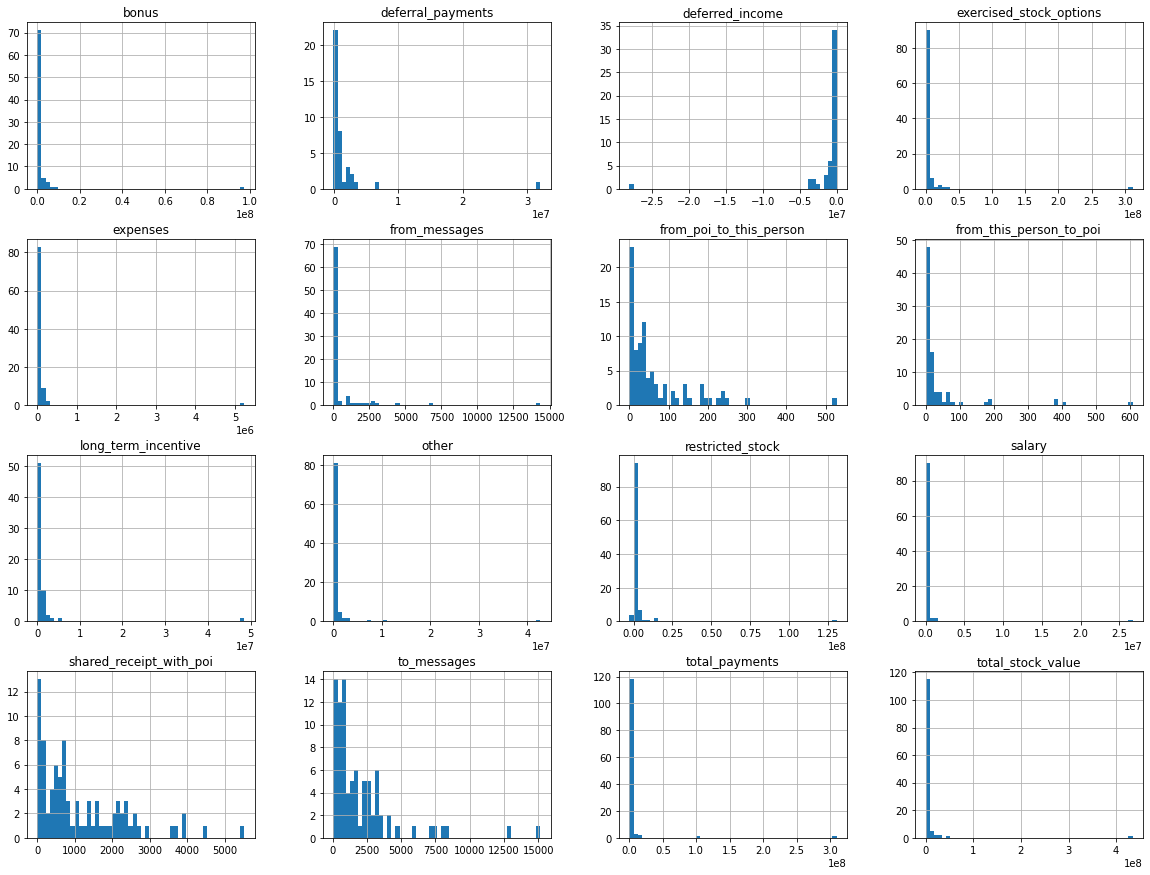

In [9]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 15))
plt.show()

### [(c) 统计量填充](https://segmentfault.com/a/1190000024522693)
若缺失率较低（小于 95%）且重要性较低，则根据数据分布的情况进行填充。
- 常用填充统计量：
    * 平均值：对于数据符合均匀分布，用该变量的均值填补缺失值。
    * 中位数：对于数据存在倾斜分布的情况，采用中位数填补缺失值。
    * 众数：离散特征可使用众数进行填充缺失值。

In [10]:
for col in num_features:
    df[col].fillna(df[col].median(), inplace=True)
    

In [11]:
na_check(df)

,Missing Ratio


In [12]:
def drop_outliers(df, field_name):
    iqr = 1.5*(np.percentile(df[field_name], 75)-np.percentile(df[field_name], 25))
    df.drop(df[df[field_name]>(iqr+np.percentile(df[field_name],75))].index, inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name], 25)-iqr)].index, inplace=True)

In [13]:
df['bonus'].head()

0    1750000.0
1    5600000.0
2     200000.0
3     800000.0
4    1250000.0
Name: bonus, dtype: float64

In [14]:
nega_col = df.columns[(df < 0).any()].tolist()
print(nega_col)
postive_col = df.columns[(df > 0).all()].tolist()
print(postive_col)

['deferral_payments', 'deferred_income', 'restricted_stock', 'total_stock_value']
['bonus', 'exercised_stock_options', 'expenses', 'from_messages', 'long_term_incentive', 'other', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments']


In [ ]:
train_data['Age_yoejohnson'], param = stats.yeojohnson(train_data.Age)
print('Optimal : ', param)
diagnostic_plots(train_data, 'Age_yoejohnson')

<Figure size 720x504 with 0 Axes>

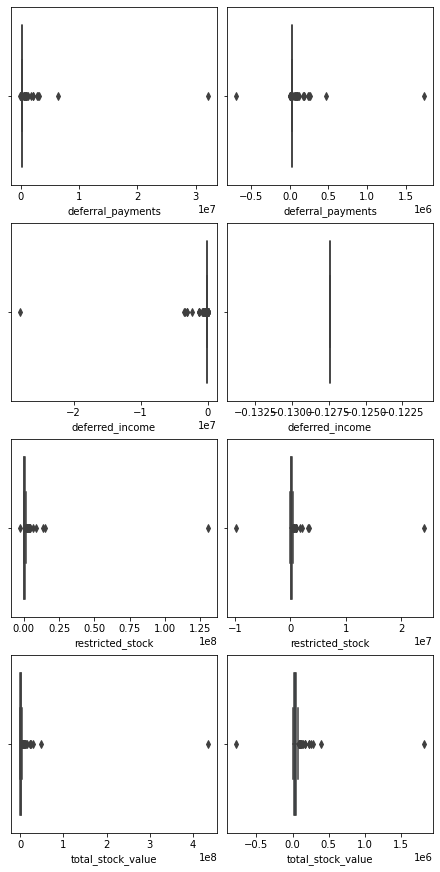

In [18]:
plt.figure(figsize=(10,7))
subplot_nea_row = len(nega_col)
subplot_nea_col = 2
subplot_nea_index = 0

fig, axs = plt.subplots(nrows=subplot_nea_row, ncols=subplot_nea_col,
                        figsize=(3*subplot_nea_col, 3*subplot_nea_row), constrained_layout=True)

'''
scaler = PowerTransformer(method = 'yeo-johnson')
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

for col in nega_col:
    sns.boxplot(df[col], ax=axs[subplot_nea_index][0])
    stats.yeojohnson(df[col])
    #df[col] = np.power((df[col]).astype(np.complex),1/3)
    df[col], lmbda = stats.yeojohnson(df[col])
    sns.boxplot(df[col], ax=axs[subplot_nea_index][1])
    subplot_nea_index = subplot_nea_index + 1
    

In [19]:
na_check(df)

,Missing Ratio


['bonus', 'exercised_stock_options', 'expenses', 'from_messages', 'long_term_incentive', 'other', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments']


<Figure size 720x504 with 0 Axes>

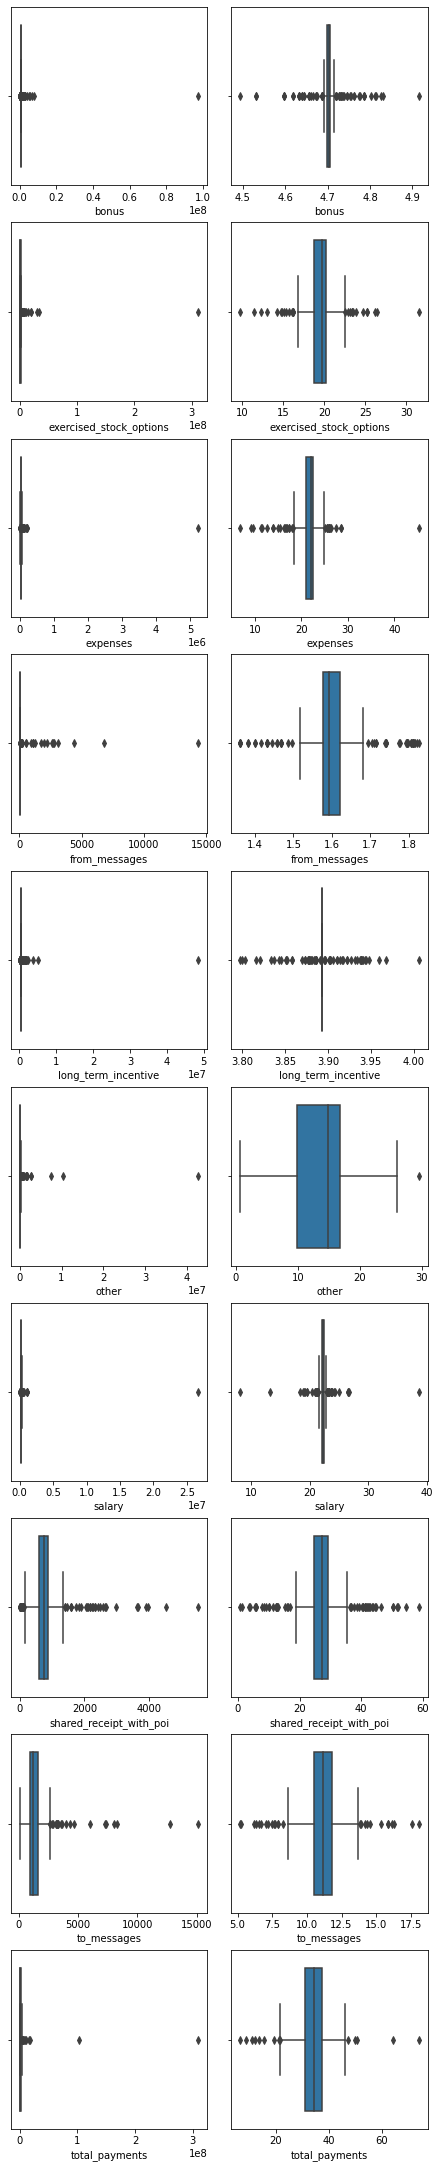

In [20]:
plt.figure(figsize=(10,7))
subplot_row = len(postive_col)
subplot_col = 2
subplot_index = 0
fig, axs = plt.subplots(nrows=subplot_row, ncols=subplot_col,
                        figsize=(3*subplot_col, 3*subplot_row), constrained_layout=True)

print(postive_col)
for col in postive_col:
    sns.boxplot(df[col], ax=axs[subplot_index][0])
    
    #drop_outliers(df, col)
    #df[col].apply(lambda x: boxcox1p(x,0.25))
    df[col], fitted_lambda = stats.boxcox(df[col])
    sns.boxplot(df[col], ax=axs[subplot_index][1])
    subplot_index = subplot_index + 1

plt.show()


In [21]:
na_check(df)

,Missing Ratio


In [22]:
#for col in num_features:
    #fig = plt.figure(figsize = (18, 10))
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    #df_train.boxplot(column = col, ax = ax1)
    #df_train.hist(column = col, ax = ax2)
    #plt.show();

In [24]:
# 將資料最大最小化
#df = MinMaxScaler().fit_transform(df)
# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
print('train_num: ', train_num)
train_X = df[:train_num]
test_X = df[train_num:]

train_num:  113


In [29]:
gdbt = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=250, max_features=14,
                                  max_depth=6, learning_rate=0.03)


In [32]:
# 梯度提升機預測檔 
gdbt.fit(train_X, train_Y)
#gdbt_pred = gdbt.predict_proba(test_X)[:,1]
#sub = pd.DataFrame({'PassengerId': ids, 'Survived': gdbt_pred})
#sub['Survived'] = sub['Survived'].map(lambda x:1 if x>0.5 else 0)

GradientBoostingClassifier(learning_rate=0.03, max_depth=6, max_features=14,
                           n_estimators=250, subsample=0.75, tol=100)